# Setup Paths

In [ ]:
import os

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'TFLITE_MODEL_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport', 'saved_model', 'detect.tflite'), 
    'TFLITE_MODEL_LABEL_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport', 'saved_model', 'label_map.txt'), 
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'OUTPUT_PATH_TFLITE': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export-tflite'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

##Move into a Training and Testing Partition

In [5]:
import os

In [11]:
TRAIN_PATH = os.path.join('YOLOV5', 'data')
ARCHIVE_PATH = os.path.join('YOLOV5', 'archive.tar.gz')

In [12]:
!tar -czf {ARCHIVE_PATH} {TRAIN_PATH}

In [ ]:
# !git clone https://github.com/ultralytics/yolov5
%cd yolov5 
# !ls
!pip install -r requirements.txt
# !ls

In [177]:
# !pip install torchvision 
# !pip list

from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
import torch
import os
# from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.2 (CPU)


In [196]:
!ls
model = torch.hub.load('./', 'custom', 'local', path='./runs/train/exp/weights/best.pt')

CONTRIBUTING.md  data             models           tutorial.ipynb
Dockerfile       dataset.yaml     requirements.txt utils
LICENSE          detect.py        runs             val.py
README.md        export.py        setup.cfg        yolov5s.pt
__pycache__      hubconf.py       train.py


HTTPError: HTTP Error 404: Not Found

In [184]:
class Bbox:
    def __init__(self, x1, y1, x2, y2, label):
        self.x1 = x1
        self.x2 = x2
        self.y1 = y1
        self.y2 = y2
        self.label = label
        self.box = [self.x1, self.y1, self.x2, self.y2]
        self.width = abs(self.x1 - self.x2)
        self.height = abs(self.y1 - self.y2)

    @property
    def area(self):
        """
        Calculates the surface area. useful for IOU!
        """
        return (self.x2 - self.x1 + 1) * (self.y2 - self.y1 + 1)

    def intersect(self, bbox):
        x1 = max(self.x1, bbox.x1)
        y1 = max(self.y1, bbox.y1)
        x2 = min(self.x2, bbox.x2)
        y2 = min(self.y2, bbox.y2)
        intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
        return intersection

    def iou(self, bbox):
        intersection = self.intersect(bbox)

        iou = intersection / float(self.area + bbox.area - intersection)
        # return the intersection over union value
        return iou
    
    def isRectangleOverlap(self, bbox):
        if (self.x1>=bbox.x2) or (self.x2<=bbox.x1) or (self.y2<=bbox.y1) or (self.y1>=bbox.y2):
            return False
        else:
            return True

In [185]:
# !ls
img = os.path.join('..', 'data', 'images', '20220120_141822.jpg')
image = Image.open(img)
width = image.size[0]
height = image.size[1]

col = 3
row = 3
each_width = width / col
each_height = height / row
cells = np.array([])
for i in range(col):
    for ii in range(row):
        x1 = each_width * i
        y1 = each_height * ii
        x2 = each_width * (i + 1)
        y2 = each_height * (ii + 1)
        box = Bbox(x1, y1, x2, y2, "{} {}".format(i + 1, ii + 1))
        cells = np.append(cells, box)

# print(cells)
# print(image.size)
results = model(img)
results.pandas().xyxy[0]
detections = results.pandas().xyxy[0].to_dict(orient="records")

for detection in detections:
    xMin = detection['xmin']
    yMin = detection['ymin']
    xMax = detection['xmax']
    yMax = detection['ymax']
    for cell in cells:
        box = Bbox(xMin, yMin, xMax, yMax, "")
        isOverlap = cell.isRectangleOverlap(box)
        if isOverlap:
            confidence = detection['confidence']
            _class = detection['class']
            name = detection['name']
            print("{} {}".format(name, cell.label))
            break
            

SimbaChocoPillow 3 2
NestleGoldCornFlakesBox 1 3
NestleKokoKrunchMaxxCup 3 2
SimbaSerealChocoChipsBox 1 2
SimbaSerealChocoChipsBox 2 2
SimbaChocoPillow 2 2
NestleKokoKrunchMaxxCup 2 1
NestleGoldCornFlakesBox 1 3
SimbaChocoPillow 2 2
SimbaChocoPillow 2 2
90101163104100 2 1
NestleKokoKrunchMaxxCup 2 2
NestleHoneyStarBox300G 2 3
90101163101100 1 1
NestleKokoKrunchMaxxCup 3 2
NestleKokoKrunchMaxxCup 2 1
NestleKokoKrunchMaxxCup 3 2
90101163101100 1 1
90101232304100 2 1
SimbaSerealChocoChipsCupCoklatSusuPutih 1 1
NestleKokoKrunchMaxxCup 3 1
SimbaSerealChocoChipsCupCoklatSusuPutih 1 1
SimbaSerealChocoChipsBucket 1 2
NestleKokoKrunchMaxxCup 2 2
NestleKokoKrunchMaxxCup 3 2
NestleKokoKrunchMaxxCup 3 2
SimbaSerealChocoChipsCupCoklatSusuPutih 1 1
NestleKokoKrunchMaxxCup 1 2
90101232304100 3 1
NestleKokoKrunchMaxxCup 2 2
90101163104100 1 1
NestleKokoKrunchMaxxCup 3 2
SimbaSerealChocoChipsCupCoklatSusuPutih 1 1
SimbaSerealChocoChipsCupCoklatSusuPutih 1 1
SimbaSerealChocoChipsCupStrawberry 3 1
Nestle

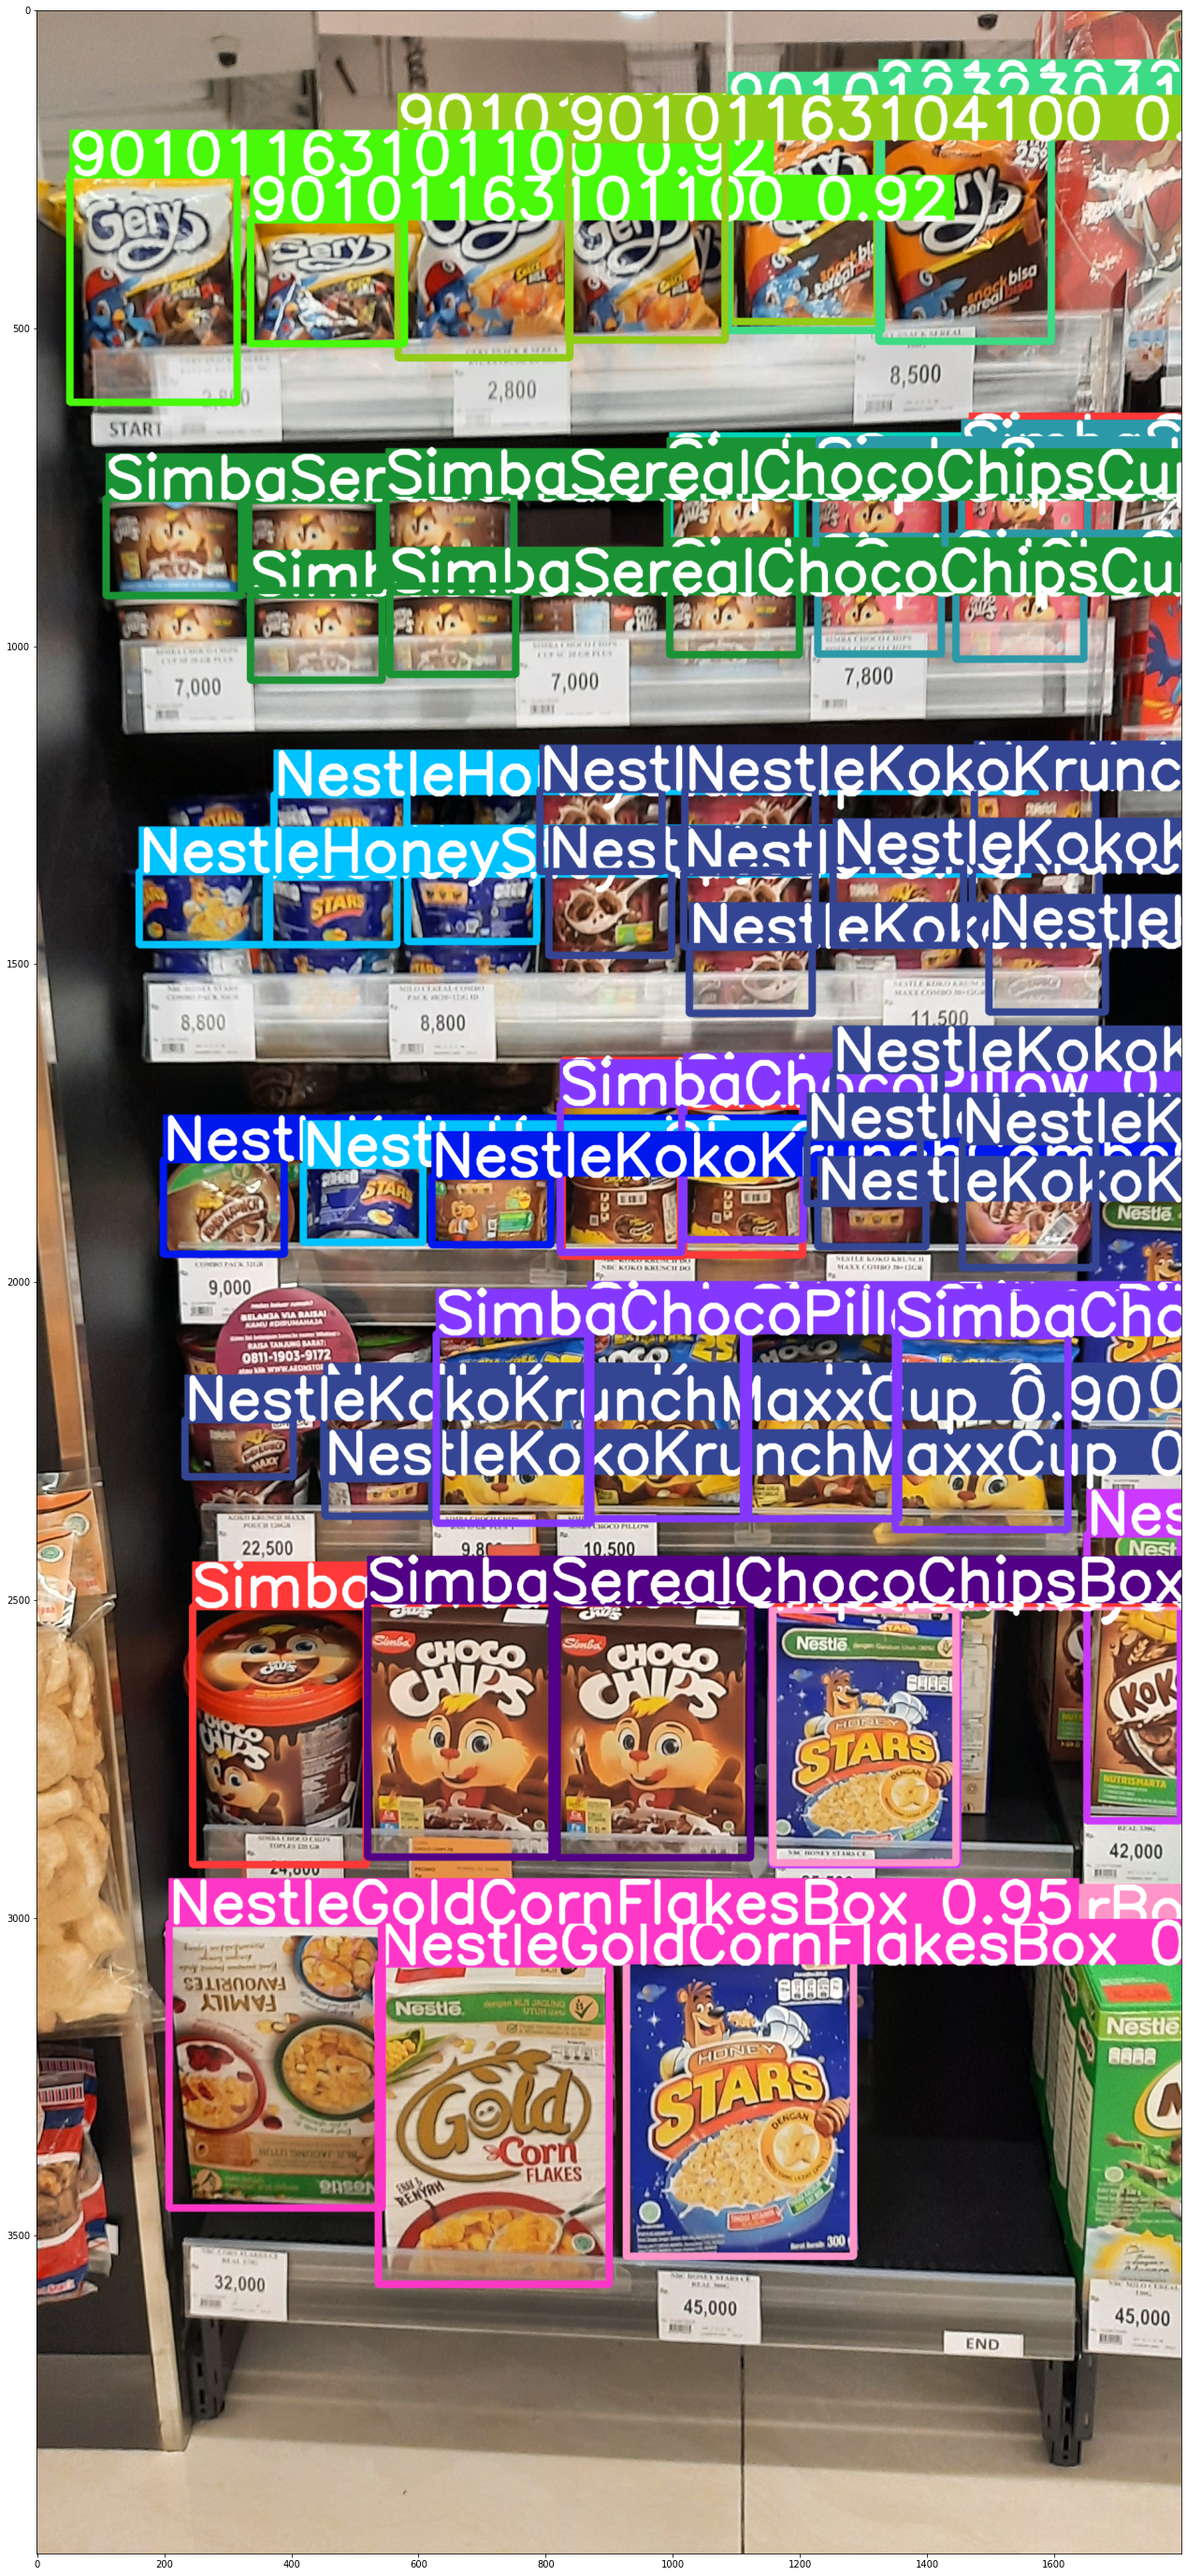

In [188]:
%matplotlib inline
plt.figure(figsize = (100, 50))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [187]:
!python train.py --img 416 --batch 32 --epochs 300 --data dataset.yaml --weights ./runs/train/exp/weights/best.pt --cache

/Users/andreyyoshuamanik/Documents/Projects/SAM-AI/sam-ai/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
train: weights=./runs/train/exp/weights/best.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv

/Users/andreyyoshuamanik/Documents/Projects/SAM-AI/sam-ai/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
/Users/andreyyoshuamanik/Documents/Projects/SAM-AI/sam-ai/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
/Users/andreyyoshuamanik/Documents/Projects/SAM-AI/sam-ai/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Set